# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달하므로,   
request와 딕셔너리를 활용하면 됨

# JSON 활용 연습
http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31

In [2]:
import requests, json, pandas as pd

In [3]:
URL ='http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [4]:
resp

<Response [200]>

In [ ]:
# 텍스트
data1 = resp.text
print(type(data1), len(data1))
print(data1) 

In [ ]:
# json
data2 = resp.json()
print(type(data2), len(data2))
print(data2)

In [ ]:
data2

In [8]:
id_, date, symbol, open_, close= [], [], [], [], []

for item in data2 :
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [9]:
df = pd.DataFrame({
    'id' : id_,
    'date' : date,
    'symbol' :symbol,
    'open' : open_,
    'close' : close,
})

In [10]:
df.head()

,id,date,symbol,open,close
0,41596,20190102,None,184.63,186.29
1,41597,20190103,None,186.2,188.77
2,41603,20190104,None,188.77,189.59
3,41609,20190107,None,190.33,189.78
4,41610,20190108,None,189.78,190.79


# 공공데이터포털 API 아파트매매 실거래자료 수집
https://wikidocs.net/85279
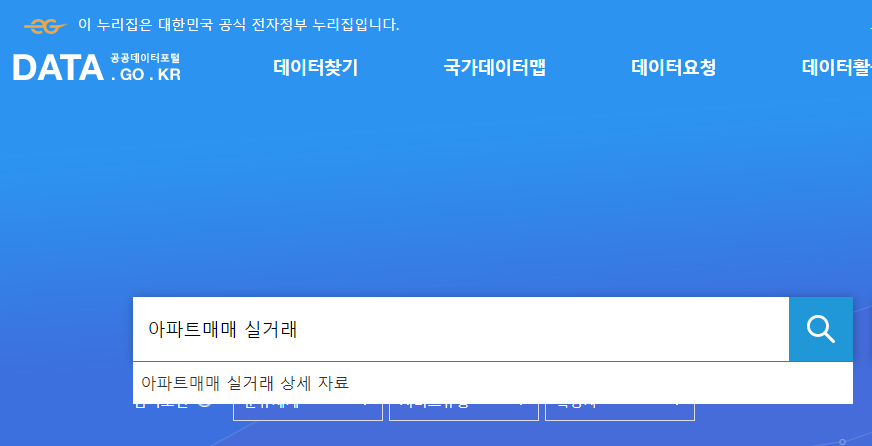

In [ ]:
BeautifulSoup?

In [11]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'

url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text
textsrc

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>

In [ ]:
BeautifulSoup?

In [12]:
soup = BeautifulSoup(textsrc, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동

In [13]:
items = soup.select('response > body > items > item') 
items

[<item><거래금액>    82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><도로명>사직로8길</도로명><도로명건물본번호코드>00004</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>03</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100135</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><법정동본번코드>0009</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드>11500</법정동읍면동코드><법정동지번코드>1</법정동지번코드><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><일련번호>11110-2203</일련번호><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>    60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><도로명>세종대로23길</도로명><도로명건물본번호코드>00047</도로명건물본번호코드><도로명건물부번호코드>00000</도로명건물부번호코드><도로명시군구코드>11110</도로명시군구코드><도로명일련번호코드>02</도로명일련번호코드><도로명지상지하코드>0</도로명지상지하코드><도로명코드>4100190</도로명코드><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><법정동본번코드>0145</법정동본번코드><법정동부번코드>0000</법정동부번코드><법정동시군구코드>11110</법정동시군구코드><법정동읍면동코드

In [17]:
a = items[0].select('거래금액') #거래금액 태그를 찾는 것
print(type(a))
print(a)

<class 'bs4.element.ResultSet'>
[<거래금액>    82,500</거래금액>]


In [15]:
b = items[0].select_one('거래금액')
print(type(b))
print(b)

<class 'bs4.element.Tag'>
<거래금액>    82,500</거래금액>


In [16]:
c = items[0].select_one('거래금액').text
print(type(c))
print(c)

<class 'str'>
    82,500


In [20]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')

items = soup.select('response > body > items > item') 

for item in items:
    print(item.select_one('거래금액').text.strip(),  #앞뒤로 공백이 있는 경우가 있어서 strip() 사용 -> 공백이 있는 이유: schema가 정의되어있어서 e.g. char()
          item.select_one('건축년도').text,
          item.select_one('년').text,
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text,
          item.select_one('월').text,
          item.select_one('일').text,
          item.select_one('전용면적').text,
          item.select_one('지번').text,
          item.select_one('지역코드').text,
          item.select_one('층').text)


82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12


In [21]:
# 반복되는 코드 정리
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

for item in items:
    for tag in item_list:
        print(item.select_one(tag).text.strip(), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## 결측값 채우기
요청 정보에 대한 응답 데이터가 없을 수도 있다.   
이 경우 별도 처리가 없으면 오류가 발생하므로 대응이 필요하다.

In [ ]:
import requests
from bs4 import BeautifulSoup

def default_text(node, text):  #해당 노드에서 데이터를 가져왔을 때, 데이터가 있으면 동작하고 없으면 text를 리턴하는 함수
    if node != None:
        return node.text.strip()
    else:
        return text
    
date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
for item in items:
    for tag in item_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

## csv 파일 저장

In [22]:
import requests, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []

for item in items:
    data_list.append([ default_text(item.select_one(tag), '') for tag in item_list]) # value를 행기준으로 맞춤, 110 X 11
print(data_list)

df = pd.DataFrame(data_list, columns=item_list)
print('='*50)
print(df)
df.to_csv('./sample/아파트매매실거래자료수집.csv', index=False, encoding='cp949') 

[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '11110', '8'], ['120,000', '2003', '2015', '내수동', '경희궁파크팰리스', '12', '24', '146.33', '95', '11110', '4'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '17', '16.98', '195-10', '11110', '8'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '18', '16.98', '195-10', '11110', '4'], ['57,000', '2006', '2015', '명륜1가', '렉스빌', '12', '29', '106.98', '19', '11110', '3'], ['44,000', '1995', '2015', '명륜2가', '아남1', '12', '1', '84.8', '4', '11110', '18'], ['52,000', '1995', '2015', '명륜2가', '아남1', '12', '10', '84.9', '4', '11110', '12']]
      거래금액  건축년도     년   법정동                  아파트   월   일    전용면적      지번  \
0   82,500  2008  2015   사직동  광화문

In [ ]:
# 기존 코드
l = []
for item in items:
    print(default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), ''))
    l.append([default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), '')])
print(l)

## 여러달 수집

In [24]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

datetime.datetime(2023, 1, 1, 0, 0)

In [25]:
# 달 바꾸기
# dateutil모듈의 relativedelta()함수 
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)
start_datetime 

datetime.datetime(2023, 2, 1, 0, 0)

In [ ]:
date = start_datetime.strftime('%Y%m') #
date

In [ ]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
start_datetime = datetime.datetime(2023, 1, 1)  #시작일 정의

data_list = []
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

while True:  
    date = start_datetime.strftime('%Y%m') #202301
    
    if date >= '202309':
        break
        
    region_code = '11110'
    
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item') 
    
    print('='*10, date, '='*10)
    
    for item in items:
        data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
    
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)  # += 1달 

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

## 여러 지역 코드 수집
지역 코드 : 각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리   
https://www.data.go.kr/data/15123287/fileData.do

```python
# import csv
# with open('region_code.csv', 'r', encoding='euc-kr') as f :
#     for line in csv.reader(f):
#         print(line)
data = pd.read_csv("region_code.csv", sep=",")
data
```

In [ ]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []        
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    for lawd_cd in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={lawd_cd}&DEAL_YMD={date}&serviceKey={apikey}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949')  #csv 파일로 만들어야 가벼움!
print('저장 완료')

# 네이버 지식인 API 연동
https://developers.naver.com/docs/serviceapi/search/kin/kin.md#%EC%A7%80%EC%8B%9DiN

In [1]:
import requests, time, os, json
from html import unescape

In [2]:
# input
client_id = 'xVpqDY_a8tcrDFKg7LuZ'
client_secret = 'NDOtbLui7x'

queries = ['전주 여행', '경주 여행']
goal_page = 5

In [4]:
# setting
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) " + \
             "AppleWebKit/537.36 (KHTML, like Gecko) " + \
             "Chrome/51.0.2704.103 Safari/537.36"

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [5]:
#왜 파일을 먼저 만들어야할까? > 미연의 오류를 방지하기위해서
# 수집량이 많을 때, 에러가 발생할 수도 있음 > 에러에 대비하기위해서 쌓자마다 바로 파일에 넣고 메모리 비워주기 > 중간에 에러가나도 지금까지 한 건 보존가능

file_name = './sample/naver_kin.txt'

with open(file_name, 'w', encoding='utf-8') as f :
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')  #column 명을 만들어준 것

In [7]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1) #f스트링 사용해도됨
response = requests.get(url, headers=headers)
response

<Response [200]>

In [ ]:
print(response.text)

In [ ]:
json.loads(response.text)

In [ ]:
json.loads(response.text)['items'] #우리가 원하는 정보는 items 안에 있음

In [13]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '}

In [14]:
def get_list(query, page): #쿼리와 페이지 수를 인자로 받는 함수
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = unescape(elm['description'].replace("<b>", "").replace("</b>", ""))
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [15]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

===== 전주 여행 0 =====
['전주 여행', 1, '전주여행코스좀짜주세요ㅜㅜ', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0', '... 알려주세요ㅠㅠ  전주여행코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... ', '전주여행코스좀짜주세요ㅜㅜ ... 알려주세요ㅠㅠ  전주여행코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... ']
['전주 여행', 2, '전주 숙소 갈만한 곳좀 알려주세요!', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ', '전주 숙소 갈만한 곳좀 알려주세요! ... 남자친구랑 오랜만에 전주 여행이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... ']
['전주 여행', 3, '1박2일 전주 커플여행', 'https://kin.naver.com/qna/detail.naver?d1i

# ChatGPT API 연동

In [ ]:
# pip install --upgrade openai
!pip install openai

In [68]:
import os
from openai import OpenAI

In [69]:
client = OpenAI(
  api_key= "api key 입력"
)

In [70]:
client.models.list()

SyncPage[Model](data=[Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal'), Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='babbage', created=1649358449, object='model', owned_by='openai'), Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai'), Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev'), Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev'), Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai'), Model(id='curie-similarity', created=1651172510, object=

In [71]:
for m in client.models.list():
    print(m)

Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal')
Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='babbage', created=1649358449, object='model', owned_by='openai')
Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai')
Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev')
Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev')
Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai')
Model(id='curie-similarity', created=1651172510, object='model', owned_by='openai-dev')


In [72]:
input_text = "인공지능이 뭐야"

In [ ]:
client.chat.completions.create?

In [73]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [74]:
type(response)

openai.types.chat.chat_completion.ChatCompletion

In [75]:
response

ChatCompletion(id='chatcmpl-8Uoa3BLGAuv9o0ROP0gdPYUkfudVF', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))], created=1702354963, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=226, prompt_tokens=15, total_tokens=241))

In [76]:
response.choices

[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))]

In [77]:
response.choices[0].message.content

'인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.'

In [78]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [79]:
chatgpt('what is ai')

'AI stands for Artificial Intelligence. It refers to the simulation of human intelligence in machines that are programmed to think, learn, and problem-solve like humans. AI encompasses various techniques such as machine learning, natural language processing, computer vision, and robotics. It has applications in a wide range of fields including healthcare, finance, transportation, gaming, and more. AI systems can analyze large amounts of data, recognize patterns, make predictions, and automate tasks, leading to improved efficiency and decision-making.'